# Механизмы потерь в одномодовых волоконно-оптических линиях связи

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


def get_value_err(values):
    return (
        np.around(np.average(values), decimals=3),
        np.around(stats.sem(values), decimals=3)
    )


def print_value_err(name, value, err, units):
    print(name + ' = ' + str(value) + ' ± ' + str(err) + ' ' + units)


def print_heading(name):
    print(name)
    print('-' * len(name))


p_in_1310_list = [-6.553, -6.975, -6.542]
p_in_1550_list = [-7.031, -7.023, -7.120]

p_in_1310, p_in_err_1310 = get_value_err(p_in_1310_list)
p_in_1550, p_in_err_1550 = get_value_err(p_in_1550_list)

print_value_err('Опорная мощность (λ = 1310 nm)', p_in_1310, p_in_err_1310, 'dBm')
print_value_err('Опорная мощность (λ = 1550 nm)', p_in_1550, p_in_err_1550, 'dBm')

Опорная мощность (λ = 1310 nm) = -6.69 ± 0.143 dBm
Опорная мощность (λ = 1550 nm) = -7.058 ± 0.031 dBm


# Упражнение 1

## Оценка величины удельного затухания в катушках

In [2]:
def u_1(name, p_in, p_in_err, length, p_out_list):
    print_heading(name)
    print('Измерения выходной мощности = ' + str(p_out_list) + ' dBm')
    p_out, p_out_err = get_value_err(p_out_list)
    print_value_err('Выходная мощность', p_out, p_out_err, 'dBm')
    a = np.around(p_in - p_out, decimals = 3)
    a_err = np.around(p_in_err + p_out_err, decimals=3)
    print_value_err('Потери', a, a_err, 'dB')
    b = np.around(a / length, decimals=3)
    b_err = np.around(b * (a_err / a + 0 / length), decimals=3)
    print_value_err('Удельные потери', b, b_err, 'dB/km')
    print()


u_1('λ = 1310 nm, ∂ = 0.33 dB/km (катушка 1)', p_in_1310, p_in_err_1310, 37.960, [-19.185, -20.149, -20.118])
u_1('λ = 1550 nm, ∂ = 0.19 dB/km (катушка 1)', p_in_1550, p_in_err_1550, 37.960, [-14.44, -15.38, -14.63])
u_1('λ = 1310 nm, ∂ = 0.32 dB/km (катушка 2)', p_in_1310, p_in_err_1310, 37.934, [-20.403, -22.788, -20.557])
u_1('λ = 1550 nm, ∂ = 0.19 dB/km (катушка 2)', p_in_1550, p_in_err_1550, 37.934, [-15.129, -15.202, -14.995])

λ = 1310 nm, ∂ = 0.33 dB/km (катушка 1)
---------------------------------------
Измерения выходной мощности = [-19.185, -20.149, -20.118] dBm
Выходная мощность = -19.817 ± 0.316 dBm
Потери = 13.127 ± 0.459 dB
Удельные потери = 0.346 ± 0.012 dB/km

λ = 1550 nm, ∂ = 0.19 dB/km (катушка 1)
---------------------------------------
Измерения выходной мощности = [-14.44, -15.38, -14.63] dBm
Выходная мощность = -14.817 ± 0.287 dBm
Потери = 7.759 ± 0.318 dB
Удельные потери = 0.204 ± 0.008 dB/km

λ = 1310 nm, ∂ = 0.32 dB/km (катушка 2)
---------------------------------------
Измерения выходной мощности = [-20.403, -22.788, -20.557] dBm
Выходная мощность = -21.249 ± 0.771 dBm
Потери = 14.559 ± 0.914 dB
Удельные потери = 0.384 ± 0.024 dB/km

λ = 1550 nm, ∂ = 0.19 dB/km (катушка 2)
---------------------------------------
Измерения выходной мощности = [-15.129, -15.202, -14.995] dBm
Выходная мощность = -15.109 ± 0.061 dBm
Потери = 8.051 ± 0.092 dB
Удельные потери = 0.212 ± 0.002 dB/km



Экспериментально полученные значения выше теоретических, что может быть связано с наличием дополнительных потерь, вызванными различными соединениями и изгибами волокна. С другой стороны, потери на длине волны 1546 нм меньше, чем на 1313 нм — это согласуется с тем, что абсолютный минимум потерь в волокне находится на длине волны 1540 нм.

# Упражнение 2

## Оценка средних потерь на сварках

In [3]:
def u_2(name, p_in, p_in_err, p_out_list):
    print_heading(name)
    p_out, p_out_err = get_value_err(p_out_list)
    print_value_err('Выходная мощность', p_out, p_out_err, 'dBm')
    a = np.around(p_in - p_out, decimals=3)
    a_err = np.around(p_in_err + p_out_err, decimals=3)
    print_value_err('Общие потери', a, a_err, 'dB')
    n = 4
    b = np.around(a / n, decimals=3)
    b_err = np.around(a_err / n, decimals=3)
    print_value_err('Потери на соединение', b, b_err, 'dB')
    print()

u_2('λ = 1310 nm', p_in_1310, p_in_err_1310, [-9.32, -8.332, -8.25])
u_2('λ = 1550 nm', p_in_1550, p_in_err_1550, [-8.412, -8.328, -8.74])

λ = 1310 nm
-----------
Выходная мощность = -8.634 ± 0.344 dBm
Общие потери = 1.944 ± 0.487 dB
Потери на соединение = 0.486 ± 0.122 dB

λ = 1550 nm
-----------
Выходная мощность = -8.493 ± 0.126 dBm
Общие потери = 1.435 ± 0.157 dB
Потери на соединение = 0.359 ± 0.039 dB



# Упражнение 3

## Оценка потерь на разъёмных соединениях

Потери
------
λ, nm	n	a, dB
1310	3	2.571 ± 0.303
1310	4	2.958 ± 0.146
1310	5	2.999 ± 0.157
1310	6	3.023 ± 0.178
1310	7	3.079 ± 0.153
1550	3	2.101 ± 0.128
1550	4	2.544 ± 0.082
1550	5	2.742 ± 0.104
1550	6	2.645 ± 0.035
1550	7	2.651 ± 0.047

Потери на одно соединение
-------------------------
λ = 1310 nm -> a = 0.628 ± 0.22 dB
λ = 1550 nm -> a = 0.541 ± 0.097 dB



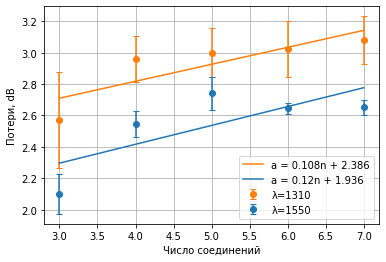

In [4]:
def u_3(data):
    '''
    data = [(l, n, p_out_list), ...]
    '''
    for i in range(len(data)):
        datum = data[i]
        l, n, p_out_list = datum
        p_out, p_out_err = get_value_err(p_out_list)
        p_in = p_in_1310 if l == 1310 else p_in_1550
        p_in_err = p_in_err_1310 if l == 1310 else p_in_err_1550
        a = np.around(p_in - p_out, decimals=3)
        a_err = np.around(p_in_err + p_out_err, decimals=3)
        data[i] = (l, n, a, a_err)
    print_heading('Потери')
    print('λ, nm\tn\ta, dB')
    for datum in data:
        l, n, a, a_err = datum
        print((
            str(l) + '\t' +
            str(n) + '\t' +
            str(a) + ' ± ' + str(a_err)
        ))
    print()
    
    print_heading('Потери на одно соединение')
    def a_per_conn(l):
        l_list, n_list, a_list, a_err_list = np.array([v for v in data if v[0] == l]).T
        a_per_conn_list = a_list / n_list
        a_per_conn, _ = get_value_err(a_per_conn_list)
        a_per_conn_err = np.around(np.sum(a_err_list / n_list), decimals=3)
        print_value_err('λ = ' + str(l) + ' nm -> a', a_per_conn, a_per_conn_err, 'dB')
    a_per_conn(1310)
    a_per_conn(1550)
    print()

    fig = plt.figure()
    ax = fig.add_subplot(111)
    def add_line(l):
        x, y, y_err = np.array([[v[1], v[2], v[3]] for v in data if v[0] == l]).T
        coef = np.polyfit(x, y, 1)
        fn = np.poly1d(coef)
        equation = 'a = '+ str(np.around(coef[0], decimals=3)) + 'n + ' + str(np.around(coef[1], decimals=3))
        color = 'tab:orange' if l == 1310 else 'tab:blue'
        ax.errorbar(x, y, y_err, capsize=3, fmt="o", color=color, label='λ='+str(l))
        ax.plot(x, fn(x), color=color, label=equation)
        ax.legend()
    ax.set_xlabel('Число соединений')
    ax.set_ylabel('Потери, dB')
    ax.grid()
    add_line(1310)
    add_line(1550)
    plt.show()


u_3([
    (1310, 3, [-9.58, -9.111, -9.091]),
    (1310, 4, [-9.651, -9.642, -9.652]),
    (1310, 5, [-9.673, -9.716, -9.678]),
    (1310, 6, [-9.642, -9.746, -9.75]),
    (1310, 7, [-9.754, -9.767, -9.787]),
    (1550, 3, [-9.327, -9.161, -8.99]),
    (1550, 4, [-9.502, -9.67, -9.635]),
    (1550, 5, [-9.707, -9.945, -9.748]),
    (1550, 6, [-9.710, -9.695, -9.703]),
    (1550, 7, [-9.678, -9.727, -9.722])
])

Уровень потерь пропорционален количеству соединений, что согласуется с теорией.

# Упражнение 4

## Оценка изгибных потерь

Потери
------
λ, nm	d, mm	n	a, dB
1310	10	25	44.517 ± 0.174
1310	16	25	1.803 ± 0.462
1310	16	15	2.943 ± 0.183
1310	16	10	2.694 ± 0.152
1310	16	5	1.222 ± 0.163
1310	22	25	1.355 ± 0.162
1310	25	25	1.384 ± 0.169
1310	32	25	2.673 ± 0.156
1310	50	25	2.665 ± 0.221
1550	10	25	61.389 ± 0.21
1550	16	25	45.605 ± 0.102
1550	16	15	32.021 ± 0.059
1550	16	10	9.432 ± 0.046
1550	16	5	9.548 ± 0.048
1550	22	25	5.998 ± 0.087
1550	25	25	3.151 ± 0.124
1550	32	25	3.694 ± 0.099
1550	50	25	2.116 ± 0.129



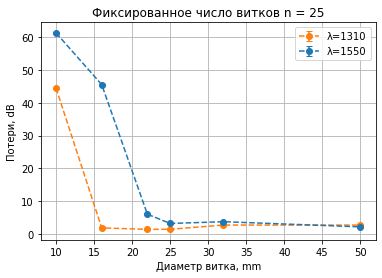

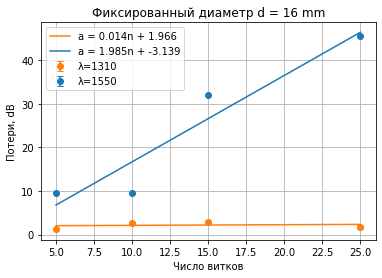

In [5]:
def u_4(data):
    '''
    data = [(l, d, n, p_out_list), ...]
    '''
    for i in range(len(data)):
        datum = data[i]
        l, d, n, p_out_list = datum
        p_out, p_out_err = get_value_err(p_out_list)
        p_in = p_in_1310 if l == 1310 else p_in_1550
        p_in_err = p_in_err_1310 if l == 1310 else p_in_err_1550
        a = np.around(p_in - p_out, decimals=3)
        a_err = np.around(p_in_err + p_out_err, decimals=3)
        data[i] = (l, d, n, a, a_err)
    print_heading('Потери')
    print('λ, nm\td, mm\tn\ta, dB')
    for datum in data:
        l, d, n, a, a_err = datum
        print((
            str(l) + '\t' +
            str(d) + '\t' +
            str(n) + '\t' +
            str(a) + ' ± ' + str(a_err)
        ))
    print()

    def fixed_n():
        fig = plt.figure()
        ax = fig.add_subplot(111)
        def add_line(l):
            x, y, y_err = np.array([[v[1], v[3], v[4]] for v in data if v[2] == 25 and v[0] == l]).T
            color = 'tab:orange' if l == 1310 else 'tab:blue'
            ax.errorbar(x, y, y_err, color=color, capsize=3, fmt="o--", label='λ='+str(l))
            ax.legend()
        ax.set_title('Фиксированное число витков n = 25')
        ax.set_xlabel('Диаметр витка, mm')
        ax.set_ylabel('Потери, dB')
        ax.grid()
        add_line(1310)
        add_line(1550)
        plt.show()
    fixed_n()

    def fixed_d():
        fig = plt.figure()
        ax = fig.add_subplot(111)
        def add_line(l):
            x, y, y_err = np.array([[v[2], v[3], v[4]] for v in data if v[1] == 16 and v[0] == l]).T
            coef = np.polyfit(x, y, 1)
            fn = np.poly1d(coef)
            equation = 'a = '+ str(np.around(coef[0], decimals=3)) + 'n + ' + str(np.around(coef[1], decimals=3))
            color = 'tab:orange' if l == 1310 else 'tab:blue'
            ax.errorbar(x, y, y_err, color=color, capsize=3, fmt="o", label='λ='+str(l))
            ax.plot(x, fn(x), color=color, label=equation)
            ax.legend()
        ax.set_title('Фиксированный диаметр d = 16 mm')
        ax.set_xlabel('Число витков')
        ax.set_ylabel('Потери, dB')
        ax.grid()
        add_line(1310)
        add_line(1550)
        plt.show()
    fixed_d()


u_4([
    (1310, 10, 25, [-51.27, -51.18, -51.172]),
    (1310, 16, 25, [-9.128, -8.24, -8.112]),
    (1310, 16, 15, [-9.607, -9.58, -9.711]),
    (1310, 16, 10, [-9.375, -9.402, -9.376]),
    (1310, 16, 5, [-7.95, -7.905, -7.88]),
    (1310, 22, 25, [-8.08, -8.015, -8.041]),
    (1310, 25, 25, [-8.124, -8.04, -8.057]),
    (1310, 32, 25, [-9.349, -9.352, -9.389]),
    (1310, 50, 25, [-9.505, -9.32, -9.24]),
    (1550, 10, 25, [-68.1, -68.54, -68.7]),
    (1550, 16, 25, [-52.752, -52.715, -52.522]),
    (1550, 16, 15, [-39.041, -39.133, -39.062]),
    (1550, 16, 10, [-16.52, -16.477, -16.473]),
    (1550, 16, 5, [-16.64, -16.59, -16.587]),
    (1550, 22, 25, [-12.948, -13.137, -13.084]),
    (1550, 25, 25, [-10.311, -10.024, -10.291]),
    (1550, 32, 25, [-10.678, -10.69, -10.889]),
    (1550, 50, 25, [-9.113, -9.043, -9.365])
])

На первом графике видно, что при больших диаметрах витков затухание имеет сравнительно небольшое значение. При уменьшении диаметра оно постепенно увеличивается и, начиная с какого-то значения, резко возрастает. Эти тенденции роста хорошо согласуются с теоретическими данными. При малых радиусах изгиба модовые пятна прямого и изогнутого волокна смещены друг относительно друга сильнее, чем при больших. Поэтому только часть мощности моды прямого волокна передается моде изогнутого волокна, а остальная же мощность преобразуется в оболочечные моды и, в конечном счете, теряется.

На втором графике видно, что при фиксированном диаметре витков затухание линейно зависит от их количества, что логично, учитывая линейную
зависимость затухания от длины волокна. При этом на длине волны 1313 нм затухание слабо меняется с увеличением количества витков, а на длине волны 1546 нм увеличивается значительно. Это объясняется тем, что с увеличением длины волны увеличивается диаметр моды и относительная доля мощности, распространяющаяся в оболочке волокна. Вследствие увеличения размеров моды все большая часть мощности моды излучается в оболочку волокна, и поэтому потери в изогнутом волокне увеличиваются.

# Выводы

В процессе выполнения работы были изучены виды потерь в ВОЛС и методы их измерения. Получены численные оценки и сделаны соответствующие выводы об интегральных потерях в катушках, а также относительно изгибных потерь и потерь на сварных, разъемных соединениях.